In [1]:
import seaborn as sns
import pandas as pd

In [2]:
sns.__version__

'0.12.0.dev0'

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_style("ticks")

In [4]:
data_file = 'data/subjective.csv'
responses = pd.read_csv(data_file)
columns = ['-2', '-1', '0', '1', '2']
probabilities = responses[columns].divide(responses['Total'], axis='index')
responses_scaled = responses / responses['Total'].mean()
responses_stacked = pd.melt(responses, value_vars=columns, var_name='response', value_name='response_count')
responses_scaled_stacked = pd.melt(responses_scaled, value_vars=columns, var_name='response', value_name='response_count')
probabilities_stacked = pd.melt(probabilities, value_vars=columns, var_name='response', value_name='response_probability')
joined_data = responses_scaled_stacked.join(probabilities_stacked[['response_probability']])
stacked_joined_data = pd.melt(joined_data, id_vars=['response'], value_vars=['response_count', 'response_probability'], var_name='type', value_name='score')

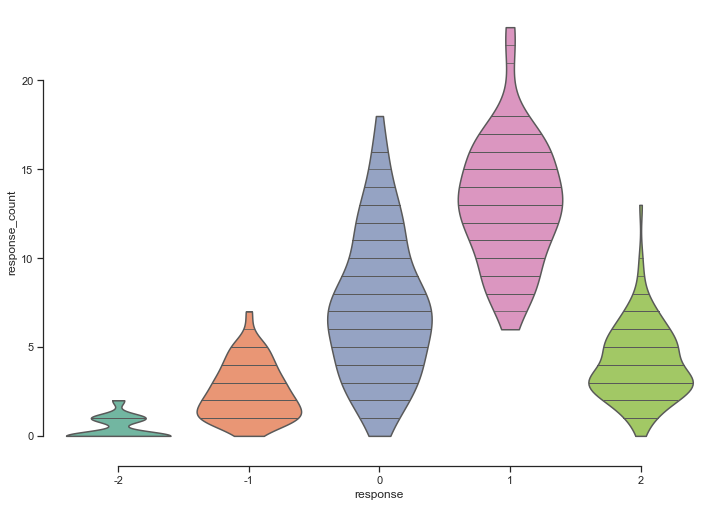

In [5]:
sns.violinplot(data=responses_stacked, x='response', y='response_count', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

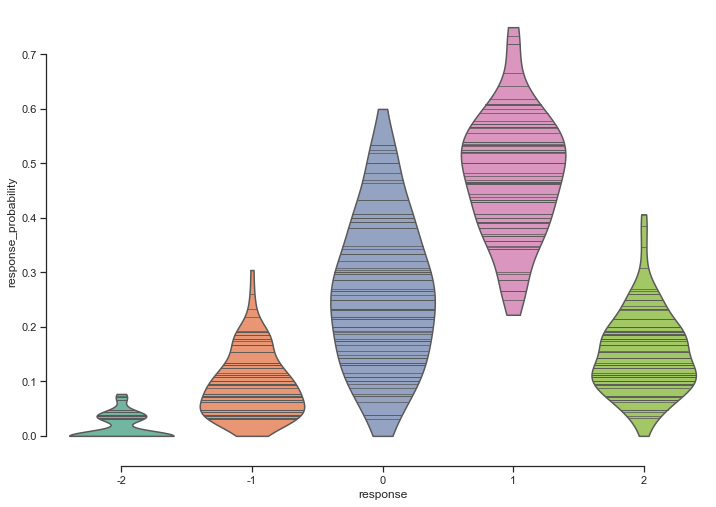

In [6]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

final_proportions: [0.01672977 0.09332715 0.26183454 0.47721558 0.15089296]


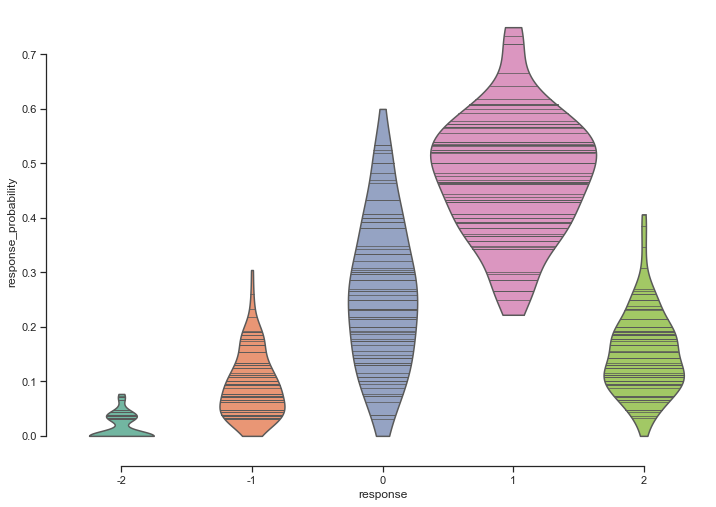

In [7]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='relative_area', inner='stick', cut=0, width=20)
sns.despine(offset=10, trim=True);

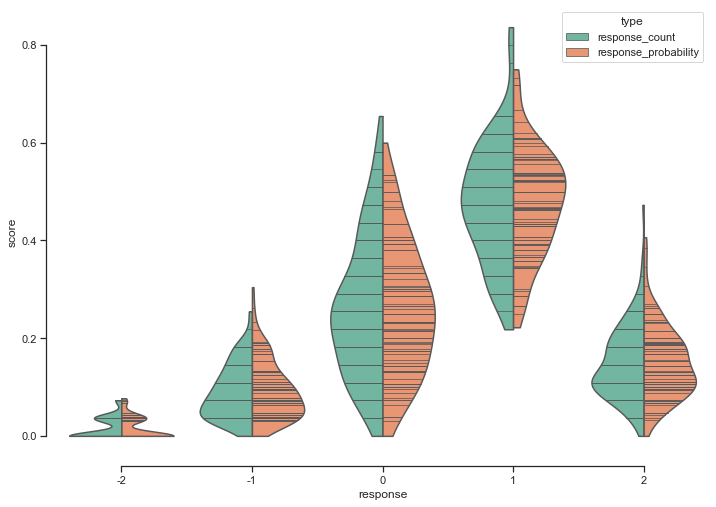

In [8]:
sns.violinplot(data=stacked_joined_data, x='response', y='score', split=True, hue='type', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

final_proportions: [[0.00167273 0.00167298]
 [0.00916364 0.00933272]
 [0.02636364 0.02618345]
 [0.04774545 0.04772156]
 [0.01505455 0.0150893 ]]


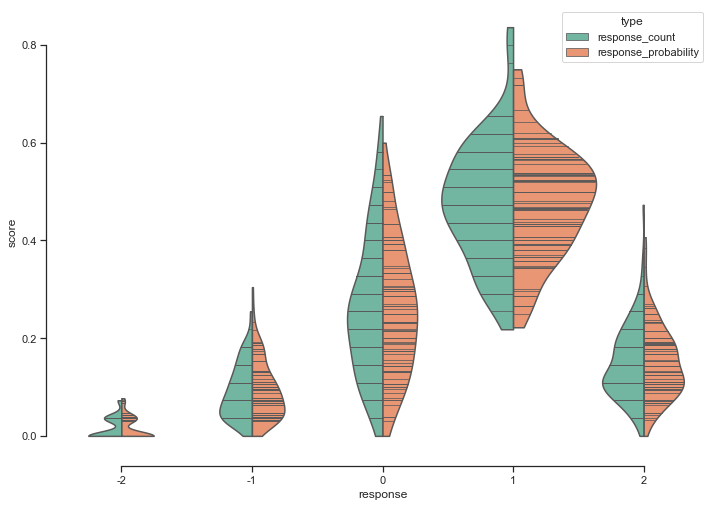

In [9]:
sns.violinplot(data=stacked_joined_data, x='response', y='score', split=True, hue='type', palette='Set2', scale='relative_area', inner='stick', cut=0, width=20, scale_hue=False)
sns.despine(offset=10, trim=True);

In [10]:
responses_scaled.sum() / responses_scaled[columns].sum().sum() * 100, probabilities.sum() / probabilities.sum().sum() * 100

(-2         1.672727
 -1         9.163636
 0         26.363636
 1         47.745455
 2         15.054545
 Total    100.000000
 dtype: float64,
 -2     1.672977
 -1     9.332715
 0     26.183454
 1     47.721558
 2     15.089296
 dtype: float64)